In [2]:
base_path = '/Users/rudra/Tech/coursera_ml_specialization/supervised_ml/week1_course_materials/home/jovyan/work'
import sys
sys.path.insert(0, base_path)

In [3]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(f'{base_path}/deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

<h3>Initialize training examples</h3>

In [4]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

<h3>Cost Function</h3>

In [6]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = w * x[i] + b
        cost += (f_wb_i - y[i]) ** 2
    cost = 1 / (2 * m) * cost
    return cost

<h3>Computing Gradients i.e. Partial derivatives of cost function w.r.t. parameters (w, b)</h3>

In [38]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw, dj_db = 0, 0
    for i in range(m):
        f_wb_i = w * x[i] + b
        dj_dw += (f_wb_i - y[i]) * x[i]
        dj_db += (f_wb_i - y[i])
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

<h3>Plotting Partial derivatives of cost function ralated to w0</h3>

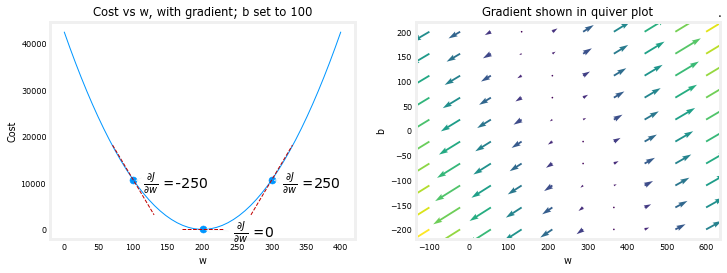

In [39]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

<h3>Gradient Descent</h3>

In [43]:
def gradient_descent(x, y, w_init, b_init, alpha, n_iter, cost_function, gradient_function):
    w = copy.deepcopy(w_init)
    J_history = []
    p_history = []
    b = b_init
    w = w_init
    for i in range(n_iter):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        #Save cost and parameters to a list for a plotting purpose
        if i < 100000: #Prevent resource exhaustion
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        
        # Print cost, partial derivates and parameters for only 10 iterations
        if i % math.ceil(n_iter / 10) == 0:
            print(f"Iteration {i:4}: Cost = {J_history[-1]:0.2e}, dj_dw = {dj_dw:0.3e}, dj_db = {dj_db:0.3e}, w = {w:0.3e}, b = {w:0.5e}")
    return w, b, J_history, p_history


In [44]:
# Intialize parameters
w_init = 0
b_init = 0

#Initialize the no. of iterations
iterations = 10000

#Initialize the learning rate
alpha = 1.0e-2

w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)

print(f"w and b found by gradient descent are ({w_final:.4f}, {b_final:.4f})")

Iteration    0: Cost = 6.36e+04, dj_dw = -6.500e+02, dj_db = -4.000e+02, w = 6.500e+00, b = 6.50000e+00
Iteration 1000: Cost = 1.56e+00, dj_dw = -3.712e-01, dj_db = 6.007e-01, w = 1.949e+02, b = 1.94915e+02
Iteration 2000: Cost = 3.63e-01, dj_dw = -1.789e-01, dj_db = 2.895e-01, w = 1.975e+02, b = 1.97549e+02
Iteration 3000: Cost = 8.42e-02, dj_dw = -8.625e-02, dj_db = 1.396e-01, w = 1.988e+02, b = 1.98818e+02
Iteration 4000: Cost = 1.96e-02, dj_dw = -4.158e-02, dj_db = 6.727e-02, w = 1.994e+02, b = 1.99430e+02
Iteration 5000: Cost = 4.55e-03, dj_dw = -2.004e-02, dj_db = 3.243e-02, w = 1.997e+02, b = 1.99725e+02
Iteration 6000: Cost = 1.06e-03, dj_dw = -9.660e-03, dj_db = 1.563e-02, w = 1.999e+02, b = 1.99868e+02
Iteration 7000: Cost = 2.46e-04, dj_dw = -4.657e-03, dj_db = 7.535e-03, w = 1.999e+02, b = 1.99936e+02
Iteration 8000: Cost = 5.71e-05, dj_dw = -2.245e-03, dj_db = 3.632e-03, w = 2.000e+02, b = 1.99969e+02
Iteration 9000: Cost = 1.33e-05, dj_dw = -1.082e-03, dj_db = 1.751e-03, 

<h3>Cost vs Iteration Plot</h3>

We are going to plot 2 diffrent graphs for Cost vs iteration because initially cost decreases sharply but it decreses gradually later. So, we need separate scaling for start and end.

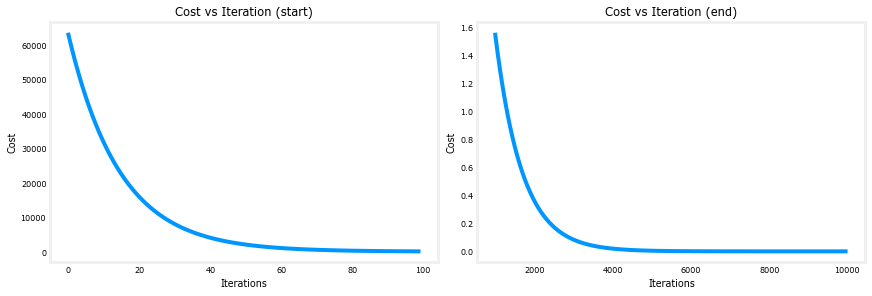

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, figsize = (12,4))
ax1.plot(j_hist[:100])
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs Iteration (start)")
ax2.set_title("Cost vs Iteration (end)")
ax1.set_xlabel("Iterations"); ax1.set_ylabel("Cost")
ax2.set_xlabel("Iterations"); ax2.set_ylabel("Cost")
plt.show()

<h3>Predictions</h3>

In [51]:
print(f"Predicted price for 1000 sqft house: {w_final * 1.0 + b_final:0.1f} Thousand Dollars")
print(f"Predicted price for 1200 sqft house: {w_final * 1.2 + b_final:0.1f} Thousand Dollars")
print(f"Predicted price for 2000 sqft house: {w_final * 2.0 + b_final:0.1f} Thousand Dollars")

Predicted price for 1000 sqft house: 300.0 Thousand Dollars
Predicted price for 1200 sqft house: 340.0 Thousand Dollars
Predicted price for 2000 sqft house: 500.0 Thousand Dollars


<h3>Plotting showing progress of Gradient Descent over Cost vs Iterations</h3>

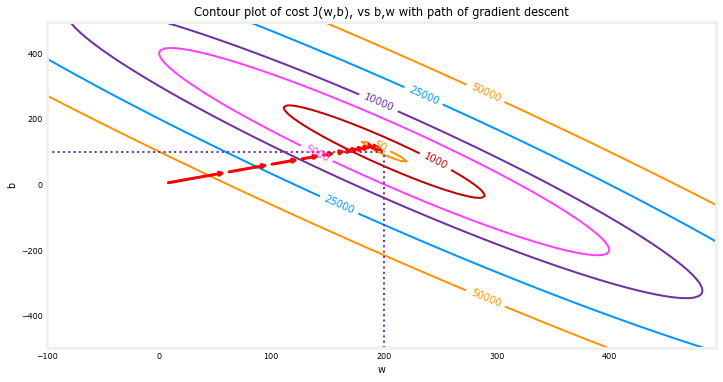

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (12,6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Zooming in the Contour plot to show the shrinking of gradient descent steps as gradient approaches to 0

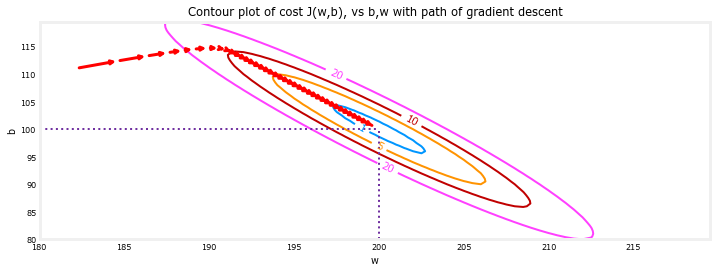

In [54]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80,120,0.5], contours=[1,5,10,20], resolution=0.5)

<h3>Gradient Descent for increased learning rate</h3>

In [56]:
w_init = 0 
b_init = 0
iterations = 10
alpha = 8.0e-01
w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)

Iteration    0: Cost = 2.03e+05, dj_dw = -6.500e+02, dj_db = -4.000e+02, w = 5.200e+02, b = 5.20000e+02
Iteration    1: Cost = 6.22e+05, dj_dw = 1.130e+03, dj_db = 7.000e+02, w = -3.840e+02, b = -3.84000e+02
Iteration    2: Cost = 1.88e+06, dj_dw = -1.970e+03, dj_db = -1.216e+03, w = 1.192e+03, b = 1.19200e+03
Iteration    3: Cost = 5.71e+06, dj_dw = 3.429e+03, dj_db = 2.121e+03, w = -1.551e+03, b = -1.55136e+03
Iteration    4: Cost = 1.73e+07, dj_dw = -5.974e+03, dj_db = -3.691e+03, w = 3.228e+03, b = 3.22797e+03
Iteration    5: Cost = 5.25e+07, dj_dw = 1.040e+04, dj_db = 6.431e+03, w = -5.095e+03, b = -5.09460e+03
Iteration    6: Cost = 1.59e+08, dj_dw = -1.812e+04, dj_db = -1.120e+04, w = 9.402e+03, b = 9.40155e+03
Iteration    7: Cost = 4.83e+08, dj_dw = 3.156e+04, dj_db = 1.950e+04, w = -1.584e+04, b = -1.58444e+04
Iteration    8: Cost = 1.46e+09, dj_dw = -5.496e+04, dj_db = -3.397e+04, w = 2.813e+04, b = 2.81261e+04
Iteration    9: Cost = 4.44e+09, dj_dw = 9.572e+04, dj_db = 5.91

We can see that after increasing the learning rate, cost is getting increased continuously and sign of partial derivative of cost are changing for each iteration, w and b are bouncing back and forth between positive and negative,

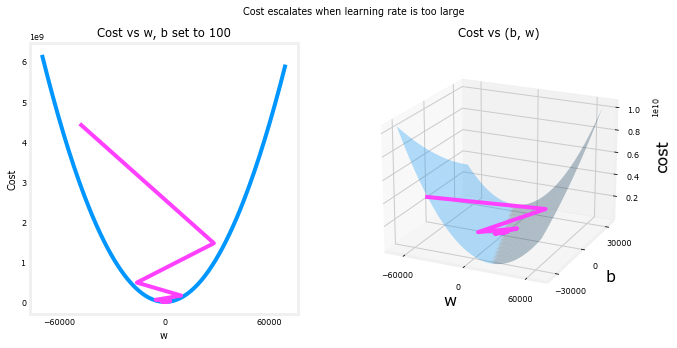

In [58]:
plt_divergence(p_hist, j_hist, x_train, y_train)
plt.show()